# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)

<img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png" width = 900>


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [48]:
# Importando o pandas
import pandas as pd

In [49]:
# Importando o dataset de treino
treino = pd.read_csv("train.csv")

In [50]:
# Visualizando essa base
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
# Retornando o shape da base
# Obs.: Como existe 1.460 Linhas e 81 Colunas, tomar cuidado para que o processo/modelo não sofra "Overfitting"
treino.shape

(1460, 81)

In [52]:
# Os dados estatísticos
treino.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [53]:
# E as informações
# Obs.: Várias Colunas possuem valores nulos/vazios
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [54]:
# Classificando as Colunas que possuem Valores Vazios na ordem decrescente e visualizando as 20 primeiras linhas por quantidade de Valores Vazios 
treino.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [55]:
# Obtendo os Valores Vazios de cada Coluna em %
# Obs.: Fazendo a divisão dos Valores Vazios pela quantidade total de linhas dada por "treino.shape[0]"
(treino.isnull().sum() / treino.shape[0]).sort_values(ascending = False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [56]:
# Podemos, de maneira simplista, eliminar as colunas com mais de 10% de valores vazios
# Obs.: Filtrar entre todas as Colunas da base de treino, somente as Colunas que possuem % maior do que 10%
colunas_eliminar = treino.columns[treino.isnull().sum() / treino.shape[0] > 0.1]
colunas_eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [57]:
# Eliminando essas colunas da base de treino
treino = treino.drop(colunas_eliminar, axis = 1)

- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Precisamos **retirar os valores vazios**
    - Vamos **eliminar as colunas de texto**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [58]:
# Verificando os valores vazios remanescentes
treino.isnull().sum().sort_values(ascending = False).head(20)

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
Electrical       1
WoodDeckSF       0
PavedDrive       0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
dtype: int64

In [59]:
# Retirando/tratando os valores vazios
# Obs.: Utilizando "treino.fillna(-1)", de maneira simplista, garante que os dados foram "carregados" e que os seus valores "vazios" serão substituídos por "-1", porém, certificar-se que na base não hajam valores negativos.
treino = treino.fillna(-1)

In [60]:
# Verificando novamente as informações referentes a Valores Vazios
treino.isnull().sum().sort_values(ascending = False).head(3)

Id             0
GarageYrBlt    0
Fireplaces     0
dtype: int64

In [61]:
# Agora selecionando apenas as colunas numéricas
# Obs.1: Observamos que existem várias colunas com Dtype = "object";
# Obs.2: Precisamos que sejam passados para os Algoritimos somente colunas com valores numéricos;
# Obs.3: Também neste caso, excluiremos de maneira simplista, todas as colunas onde o "dtypes" seja diferente de "object";
colunas_numericas = treino.columns[treino.dtypes != "object"]
colunas_numericas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [62]:
# E criar uma nova base pegando somente as Colunas desta lista, ou seja, com as Colunas Numéricas, renomeando a base ou mantendo o mesmo nome.
treino = treino.loc[:, colunas_numericas]
treino.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


### - Essa será nossa base inicial para começar, e que será utilizada para **`Comparação`**

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [63]:
# Selecionando X e y
X = treino.drop("SalePrice", axis = 1)
y = treino.SalePrice

In [64]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [65]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

### **Modelo Regressão Linear**

In [66]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [67]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [68]:
# Fazendo a previsão para os dados de teste
y_pred_rl = reg_rl.predict(X_test)

### **Modelo Árvore de Decisão**

In [69]:
# Importando a árvore de regressão
from sklearn import tree

In [70]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [71]:
# Fazendo a previsão para os dados de teste
y_pred_ad = reg_ad.predict(X_test)

### **Modelo KNeighbors Regressor**

In [72]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [73]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors = 2).fit(X_train, y_train)

In [74]:
# Fazendo a previsão para os dados de teste
y_pred_knn = reg_knn.predict(X_test)

### **Métodos de avaliação dos Modelos**

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [75]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [76]:
# Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [77]:
# Avaliando o erro da Regressão Linear
print("erro médio absoluto RL:", mean_absolute_error(y_test, y_pred_rl))
print("erro quadrático médio RL:", mean_squared_error(y_test, y_pred_rl))

erro médio absoluto RL: 23763.18739306456
erro quadrático médio RL: 1533982883.444894


In [78]:
#  Avaliando o erro da Árvore de Decisão
print("erro médio absoluto AD:", mean_absolute_error(y_test, y_pred_ad))
print("erro quadrático médio AD:", mean_squared_error(y_test, y_pred_ad))

erro médio absoluto AD: 27330.0622406639
erro quadrático médio AD: 2100977281.746888


In [79]:
#  Avaliando o erro do KNN
print("erro médio absoluto KNN:", mean_absolute_error(y_test, y_pred_knn))
print("erro quadrático médio KNN:", mean_squared_error(y_test, y_pred_knn))

erro médio absoluto KNN: 33273.08298755187
erro quadrático médio KNN: 2733937586.841286


### **Podemos plotar visualmente a relação do y_test com as previsões feitas**
- Para isso vamos utilizar o matplotlib, link: https://matplotlib.org/

In [80]:
# Importando o matplotlib
import matplotlib.pyplot as plt

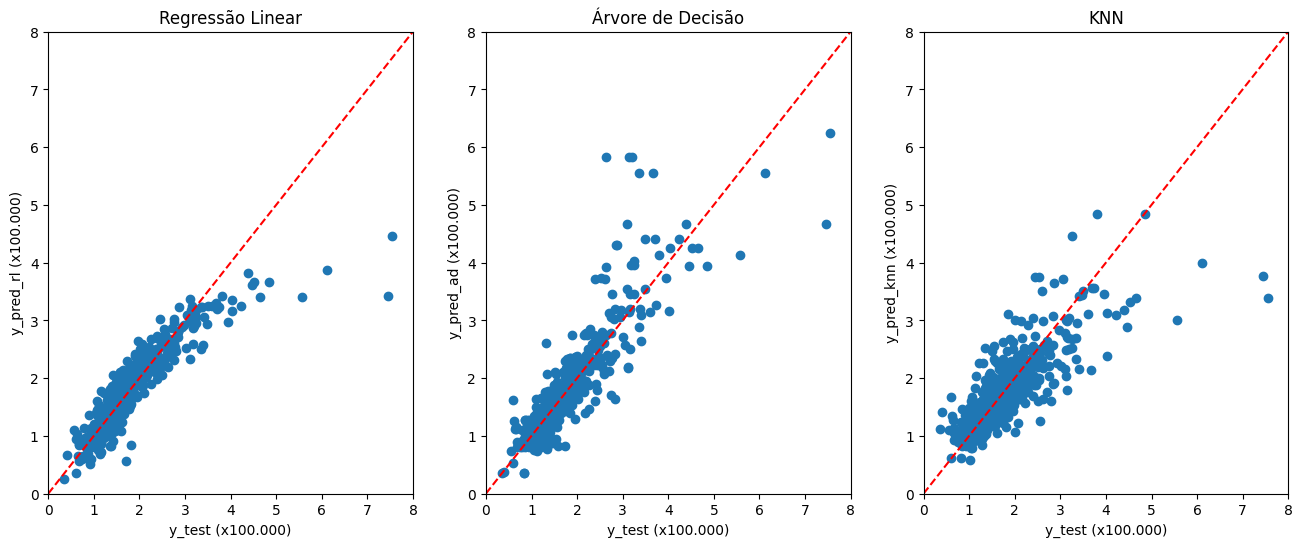

In [81]:
# Criando os gráficos referentes aos 3 Modelos
fig, ax = plt.subplots(ncols = 3, figsize = (16, 6))

# Obs.: Fazendo a divisão de y_test e de y_pred_rl por 100000 para melhorarmos a Escala

# 1) Gráfico da Regressão Linear + Reta de acertos da Previsão
ax[0].scatter(y_test / 100000, y_pred_rl / 100000)
ax[0].plot([0, 8], [0, 8], "--r")

# 2) Gráfico da Árvore de Decisão + Reta de acertos da Previsão
ax[1].scatter(y_test / 100000, y_pred_ad / 100000)
ax[1].plot([0, 8], [0, 8], "--r")

# 3) Gráfico do KNN + Reta de acertos da Previsão
ax[2].scatter(y_test / 100000, y_pred_knn / 100000)
ax[2].plot([0, 8], [0, 8], "--r")


# Limites do Eixo y, Labels e Title de cada Gráfico
ax[0].set(xlim = (0, 8), ylim = (0, 8))
ax[0].set_xlabel("y_test (x100.000)")
ax[0].set_ylabel("y_pred_rl (x100.000)")
ax[0].set_title("Regressão Linear")

ax[1].set(xlim = (0, 8), ylim = (0, 8))
ax[1].set_xlabel("y_test (x100.000)")
ax[1].set_ylabel("y_pred_ad (x100.000)")
ax[1].set_title("Árvore de Decisão")

ax[2].set(xlim = (0, 8), ylim = (0, 8))
ax[2].set_xlabel("y_test (x100.000)")
ax[2].set_ylabel("y_pred_knn (x100.000)")
ax[2].set_title("KNN")

plt.show()

#### **`CONCLUSÃO: Conforme análise dos resultados, utilizaremos o Modelo da Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica utilizada pelo Kaggle para a classificação dos modelos.`**

## Fazendo a previsão para a base de teste da competição

In [82]:
# Importando a base de teste
teste = pd.read_csv("test.csv")

In [83]:
# Visualizando a base
# Obs.: Nesta base não existe a Coluna "SalePrice", pois é justamente a informação dessa Coluna que queremos prever.
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### - **`Agora vamos repetir os mesmos tratamentos que fizemos na base de treino`**

- Obs: **não podemos excluir linhas**

In [84]:
# Eliminando da base de teste as mesmas colunas que foram eliminadas da base de treino
teste = teste.drop(colunas_eliminar, axis = 1)

In [85]:
# Verificando as colunas numéricas
# Selecionando apenas as colunas numéricas da base de teste
# Obs.1: Observamos que existem várias colunas com Dtype = "object";
# Obs.2: Precisamos que sejam passados para os Algoritimos somente colunas com valores numéricos;
# Obs.3: Também neste caso, excluiremos de maneira simplista, todas as colunas onde o "dtypes" seja diferente de "object";
colunas_numericas_teste = teste.columns[teste.dtypes != "object"]
colunas_numericas_teste

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [86]:
# Mantendo também apenas as colunas numéricas
# E criar uma nova base pegando somente as Colunas desta lista, ou seja, com as Colunas Numéricas, renomeando a base ou mantendo o mesmo nome.
teste = teste.loc[:, colunas_numericas_teste]

In [87]:
# Verificando a base restante
teste.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [88]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending = False).head(3)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
dtype: int64

### **Podemos alterar todos esses valores vazios por -1**
    
- Não vai ser confundido com o zero
- Depois conseguimos retornar de forma fácil os valores que fizemos esse ajuste

In [89]:
# Trocando todos os valores vazios por -1
# Obs.: Utilizando "treino.fillna(-1)", de maneira simplista, garante que os dados foram "carregados" e que os seus valores "vazios" serão substituídos por "-1", porém, certificar-se que na base não hajam valores negativos.
teste = teste.fillna(-1)

In [90]:
# Verificando novamente as informações referentes a Valores Vazios
teste.isnull().sum().sort_values(ascending = False).head(3)

Id              0
MSSubClass      0
BedroomAbvGr    0
dtype: int64

### **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [91]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred = reg_rl.predict(teste)
y_pred

array([122234.99595955, 139178.26368423, 169872.05425123, ...,
       175307.58803209, 106132.5314242 , 251494.07738729])

In [92]:
# Podemos adicionar essa coluna "SalePrice" de previsão na nossa base
teste["SalePrice"] = y_pred

In [93]:
# E extrair somente o Id e o SalePrice que são as informações a serem passadas para o Kaggle
base_kaggle = teste[["Id", "SalePrice"]]
base_kaggle.head()

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229


In [94]:
# Podemos então exportar essa base criando um arquivo csv
# Obs.: Utilizar o parâmetro "index = False" para suprimir a Coluna de Indices
base_kaggle.to_csv("resultado01.csv", index = False)